In [1]:
import pandas as pd
import sqlite3

# load data from the SQLite database
def load_data():
    conn = sqlite3.connect('database.db')
    query = "SELECT age, volume FROM hearing_test"
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Load data
data = load_data()
print(data.head())


   age  volume
0   20      26
1   20      65
2   20      50
3   15      50
4   15      10


In [2]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming 'data' is already loaded
# Step 1: Prepare the data for clustering
X = data[['age', 'volume']]

# Step 2: Define the number of clusters
num_clusters = 3  # You can adjust this value based on your analysis

# Step 3: Create and fit the K-means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Print the resulting clusters
print(data.head())


   age  volume  cluster
0   20      26        2
1   20      65        0
2   20      50        0
3   15      50        0
4   15      10        1


In [3]:
# Step 1: Group by cluster and calculate average age and volume
average_age_volume = data.groupby('cluster').agg({'age': 'mean', 'volume': 'mean'}).reset_index()

# Step 2: Rename the columns for clarity
average_age_volume.columns = ['Cluster', 'Average Age', 'Average Volume']

# Print the average age and volume for each cluster
print(average_age_volume)


   Cluster  Average Age  Average Volume
0        0    18.333333       55.000000
1        1    18.333333       11.666667
2        2    20.000000       26.000000


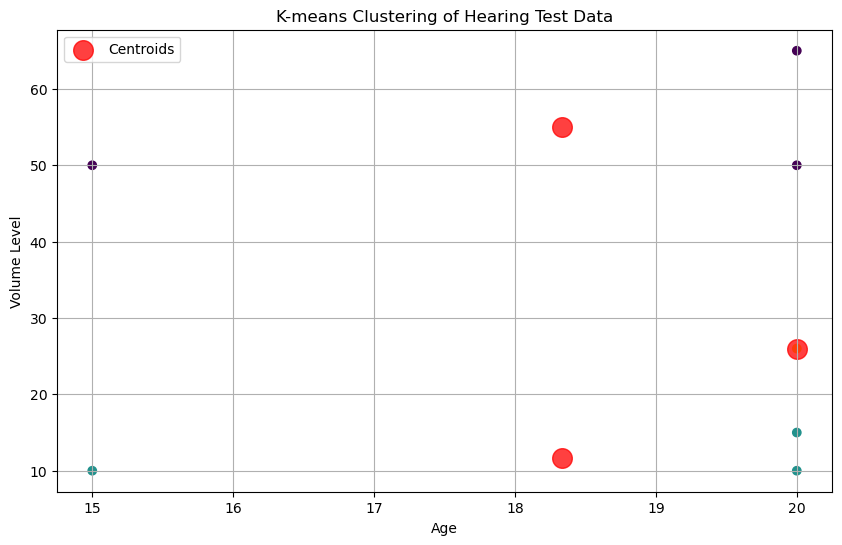

In [4]:
import matplotlib.pyplot as plt

# Step 1: Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['volume'], c=data['cluster'], cmap='viridis', marker='o')

# Step 2: Add cluster centroids to the plot
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, label='Centroids')

# Step 3: Add labels and title
plt.title('K-means Clustering of Hearing Test Data')
plt.xlabel('Age')
plt.ylabel('Volume Level')
plt.legend()
plt.grid()
plt.show()
